In [0]:
import pandas as pd
import spacy
import nltk
#nltk.download('vader_lexicon')

In [0]:
import numpy as np
import sys, os

In [0]:
pwd

'C:\\Users\\feder\\jupyter\\NLP course'

In [0]:
tweets= []
with open("dev_tweets.txt") as f:
    for line in f:
        tweets.append(line.strip())
len(tweets)

1502

In [0]:
np.linspace(1.2,1.4,8)

array([1.2       , 1.22857143, 1.25714286, 1.28571429, 1.31428571,
       1.34285714, 1.37142857, 1.4       ])

In [0]:
df_tweets= pd.DataFrame(tweets)
tweets_labeled = pd.concat([df_tweets, pd.read_table("dev_categories.txt", header= None)], axis=1)
tweets_labeled.columns= ['tweet', 'label']
tweets_labeled.head()

,tweet,label
0,Last Saturday ! SMILE_HAPPY #Happy Halloween !...,positive
1,"Heat , Celtics , Bulls , knicks&gt ; RT @Gama ...",neutral
2,@TheTomHendricks could n't be without it now m...,negative
3,Good Saturday afternoon workout . By Myself ! ...,positive
4,@madgarden @rocketcatgames I 'll see if there ...,neutral


### Importing the file of tweets parsed with CoreNLP

In [0]:
parsed= pd.read_table("dev_tweets_parsed.txt", header= None)
parsed.columns= [['index', 'token', 'lemma', 'pos', 'entity', 5, 'parent']]
parsed.head(26)

,index,token,lemma,pos,entity,5,parent
0,1,Last,last,JJ,DATE,_,0
1,2,Saturday,Saturday,NNP,DATE,_,0
2,3,!,!,.,O,_,0
3,4,SMILE_HAPPY,SMILE_HAPPY,NNP,O,_,0
4,5,#Happy,#Happy,NNP,O,_,0
5,6,Halloween,Halloween,NNP,DATE,_,0
6,7,!,!,.,O,_,0
7,8,SMILE_HAPPY,SMILE_HAPPY,NNP,MISC,_,0
8,9,Can,can,MD,MISC,_,0
9,10,someone,someone,NN,O,_,0


# Sentiment Analysis using NLTK built-in libraries (skip this section)

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

C:\Users\feder\AppData\Local\Continuum\anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
"""SETTING UPPER BOUND AND LOWER BOUND SCORES FOR NEUTRAL TWEETS"""
ub= 0.34
lb= -0.34

In [0]:
tweets_labeled = pd.concat([df_tweets, pd.read_table("dev_categories.txt", header= None)], axis=1)
tweets_labeled.columns= ['tweet', 'label']

tweets_labeled['scores'] = tweets_labeled['tweet'].apply(lambda review: sid.polarity_scores(review))

tweets_labeled['compound']  = tweets_labeled['scores'].apply(lambda score_dict: score_dict['compound'])

tweets_labeled['predicted'] = tweets_labeled['compound'].apply(lambda c: 'positive' if c >ub else ('negative' if c<lb else 'neutral'))

tweets_labeled.head()

,tweet,label,scores,compound,predicted
0,Last Saturday ! SMILE_HAPPY #Happy Halloween !...,positive,"{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'comp...",0.5399,positive
1,"Heat , Celtics , Bulls , knicks&gt ; RT @Gama ...",neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2,@TheTomHendricks could n't be without it now m...,negative,"{'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'comp...",0.3365,neutral
3,Good Saturday afternoon workout . By Myself ! ...,positive,"{'neg': 0.0, 'neu': 0.842, 'pos': 0.158, 'comp...",0.4926,positive
4,@madgarden @rocketcatgames I 'll see if there ...,neutral,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


In [0]:
df= tweets_labeled
df['compound'].min(), df['compound'].max()

(-0.9337, 0.9725)

#### DISTIRBUTION OF NEUTRAL COMPOUNDS

(array([  9.,  19.,  25.,  43., 305.,  40.,  68.,  93.,  47.,  22.]),
 array([-0.9337 , -0.74464, -0.55558, -0.36652, -0.17746,  0.0116 ,
         0.20066,  0.38972,  0.57878,  0.76784,  0.9569 ]),
 <a list of 10 Patch objects>)

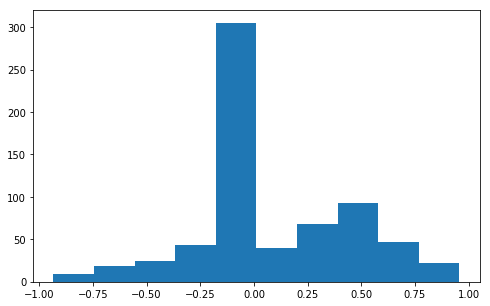

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,5))
plt.hist(df[ (df['label']=='neutral')]['compound'])

In [0]:
df= tweets_labeled
len(df[ (df['label']=='neutral') & (df['predicted']== 'neutral')])/len(df[df['label']=='neutral'])

0.6438152011922503

In [0]:
recall= len(df[ (df['label']=='neutral') & (abs(df['compound']< ub ))])/len(df[df['label']=='neutral'])
recall

0.7108792846497765

In [0]:
df= tweets_labeled
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, recall_score, f1_score
def scores_df (df, true= 'label', pred= 'predicted'):
    print('accuracy is {}, F1 measure is {}'.format(accuracy_score(df[true],df[pred]), f1_score(df[true],df[pred], average= 'weighted')))
    print('\n')
    print(classification_report(df[true],df[pred]))
    print('\n')
    print(confusion_matrix(df[true],df[pred]))

scores_df(df)

accuracy is 0.6158455392809588, F1 measure is 0.6109458116911621


             precision    recall  f1-score   support

   negative       0.61      0.42      0.50       307
    neutral       0.62      0.64      0.63       671
   positive       0.61      0.70      0.65       524

avg / total       0.62      0.62      0.61      1502



[[128 128  51]
 [ 58 432 181]
 [ 23 136 365]]


In [0]:
tweets_train = []
with open("train_tweets.txt", encoding='utf-8') as f:
    for line in f:
        tweets_train.append(line.strip())
        
df= pd.DataFrame(tweets_train)
tweets_labeled = pd.concat([df, pd.read_table("train_categories.txt", header= None)], axis=1)
tweets_labeled.columns= ['tweet', 'label']


tweets_labeled['scores'] = tweets_labeled['tweet'].apply(lambda review: sid.polarity_scores(review))

tweets_labeled['compound']  = tweets_labeled['scores'].apply(lambda score_dict: score_dict['compound'])

tweets_labeled['predicted'] = tweets_labeled['compound'].apply(lambda c: 'positive' if c >ub else ('negative' if c<lb else 'neutral'))

tweets_labeled.head()

scores_df(tweets_labeled)

accuracy is 0.6035359371388953, F1 measure is 0.6009158809123211


             precision    recall  f1-score   support

   negative       0.48      0.39      0.43      1279
    neutral       0.63      0.63      0.63      4131
   positive       0.61      0.65      0.63      3244

avg / total       0.60      0.60      0.60      8654



[[ 504  563  212]
 [ 377 2597 1157]
 [ 168  954 2122]]


# BOW MODEL 
1. First classical, with term frequency (CountVectorizer..) 
2. then TF-IDF
3. then TF-IDF modified with polarity terms

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

tweets_labeled = pd.concat([df_tweets, pd.read_table("dev_categories.txt", header= None)], axis=1)
tweets_labeled.columns= ['tweet', 'label']
df= tweets_labeled

**I do not consider punctuation as lemmas, so I take it off from tweets**

In [0]:
"""IMPORTANTE: mantengo ! e #, + e - --> è una scelta"""
import string
punct= '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' 
punct= [el for el in punct if el not in ['!', "#", '+', '-']]
punct[:5]

['"', '$', '%', '&', "'"]

In [0]:
''.join(punct)

'"$%&\'()*,./:;<=>?@[\\]^_`{|}~'

In [0]:
df['tweet']= df['tweet'].apply(lambda x: x.strip(''.join(punct))) #tolgo la punctuation ai tweets

In [0]:
X = df['tweet']  # this time we want to look at the text
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #X_train ha 1006 elementi

In [0]:
""" Inutile, CountVectorizer è il BOW semplice basato sulle frequenze..pessimo per la SA"""

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)  #se aggiungo to_dense() o toarray() posso visualizzare matrice
X_train_counts.shape

(1006, 4429)

In [0]:
X_train_counts.toarray()  #la max frequenza è 5

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [0]:
## Stemming
nltk.download('averaged_perceptron_tagger')

from nltk.stem import PorterStemmer
ps = PorterStemmer()
words = ['this','movie','is','wonderful']
words = [ps.stem(x) for x in words]
words

['thi', 'movi', 'is', 'wonder']

In [0]:
def scores (true, pred):
    """ACCURACY, F1-MEASURE, CONFUSION MATRIX E CLASSIFICATION REPORT"""
    print('accuracy is {}, F1 measure is {}'.format(accuracy_score(true,pred), f1_score(true,pred, average= 'weighted')))
    print('\n')
    print(classification_report(true,pred))
    print('\n')
    print(confusion_matrix(true,pred))

### Create function that given a sentence, returns the POS tagging

In [0]:
from nltk.corpus import wordnet as wn
from nltk import word_tokenize, TreebankWordTokenizer, sent_tokenize    
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
tokenizer= TreebankWordTokenizer()

#nltk.download('wordnet')   <-- DECOMMENTALA E INSTALLALO!
print(nltk.pos_tag(nltk.word_tokenize(X_train[0])[:7])) #prova per vedere se fa il POS di una frase

[('Last', 'JJ'), ('Saturday', 'NNP'), ('!', '.'), ('SMILE_HAPPY', 'NNP'), ('#', '#'), ('Happy', 'NNP'), ('Halloween', 'NNP')]


In [0]:
# faccio una prova
word = 'going'
lemmatizer.lemmatize(word, 'v')

'go'

#### Doing some Trials: I must do POS on the tokenized sentence on a list. It can't be done on a single word.

In [0]:
s1= ['I', 'love', 'you']
s2= ['My', 'love', 'is', 'intense']

nltk.pos_tag(s1)

[('I', 'PRP'), ('love', 'VBP'), ('you', 'PRP')]

In [0]:
for elem in s1:
    print(nltk.pos_tag([elem]))   #qui 'love' me lo da come Noun!!! ERRRORE.

[('I', 'PRP')]
[('love', 'NN')]
[('you', 'PRP')]


In [0]:
def penn_to_wn(tag):
    """
    Convertion between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ    # 'a', that is 'adjective'
    elif tag.startswith('N'):
        return wn.NOUN   # 'n', that is 'noun'
    elif tag.startswith('R'):
        return wn.ADV    # 'r', that is 'adverb'
    elif tag.startswith('V'):
        return wn.VERB   #  'v', that is 'verb'
    return 'n'   #I put noun by default

In [0]:
for elem in nltk.pos_tag(TreebankWordTokenizer().tokenize(X_train[0])[:7]):
    print(lemmatizer.lemmatize(elem[0], penn_to_wn(elem[1])))

Last
Saturday
!
SMILE_HAPPY
#
Happy
Halloween


## LEMMATIZATION

##### I do the POS of each word and I put the lemma in a list

In [0]:
def tokenize_tag(sentence):
    """IT WORKS BOTH WITH A STRING AND A LIST OF WORDS. IT RETURNS A SET OF LEMMAS"""
    if type(sentence)== str:
        list_tokens = tokenizer.tokenize(sentence)
    elif type(sentence)==list:
        string= ' '.join(sentence)
        list_tokens= tokenizer.tokenize(string)
        
    tagged_sent= nltk.pos_tag(list_tokens)
    """TAGGING WITH Wordnet Notation ('a', 'n', 'v' and 'r')"""
    """ tagged_wn= []
    for item in tagged_sent:
        tagged_wn.append((item[0].lower(), penn_to_wn(item[1])))
        
    return tagged_wn"""
    return tagged_sent

In [0]:
tokenize_tag('you are my love'), tokenize_tag('i love you')  #corretto, love è prima verbo poi nome

([('you', 'PRP'), ('are', 'VBP'), ('my', 'PRP$'), ('love', 'NN')],
 [('i', 'NN'), ('love', 'VBP'), ('you', 'PRP')])

In [0]:
def tokenize_tag_lemmatize(sentence):
    """TOKENIZING AND LEMMATIZING"""
    tagged_sent= tokenize_tag(sentence)
    """LEMMATIZING"""
    lemmas= []
    for item in tagged_sent:
        lemma= lemmatizer.lemmatize(item[0].lower(), penn_to_wn(item[1]))
        #lemmas.add(lemma)
        lemmas.append(lemma)
        
    return set(lemmas)

In [0]:
from log_progess import log_progress
def bag_of_lemmas(tweets):
    """IL SET MI GARANTISCE CHE ELEMENTI SIANO UNICI"""
    list_of_lemmas=[]
    count= 0
    for i in log_progress(tweets.index, every=1):
        sent= X_train[i]
        lemmas = list(tokenize_tag_lemmatize(sent))
        
        list_of_lemmas+=lemmas
    return set(list_of_lemmas)

In [0]:
list_of_lemmas = bag_of_lemmas(X_train)
terms= list(list_of_lemmas)
terms[:6], len(terms)

(['kk', 'competition', 'domino', 'market', 'result', 'brittania'], 4157)

In [0]:
len(terms)   #4157 terms over 1006 tweets

4157

**Now I have the Bag of Lemmas: I have to create the Matrix Lemma x Tweets with the frequencies. Then I will transform in TF-IDF**

In [0]:
tfidf_vectorizer = TfidfVectorizer(vocabulary= list(terms), stop_words='english')

In [0]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train.values)

In [0]:
diz_terms= tfidf.vocabulary_

In [0]:
### converting to dense matrix

def_tfidf_lemmat.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

## Working on Polarities

In [0]:
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
#nltk.download('sentiwordnet')

list(swn.senti_synsets('happy' , 'a')), list(swn.senti_synsets('slow'))

([SentiSynset('happy.a.01'),
  SentiSynset('felicitous.s.02'),
  SentiSynset('glad.s.02'),
  SentiSynset('happy.s.04')],
 [SentiSynset('decelerate.v.01'),
  SentiSynset('slow.v.02'),
  SentiSynset('slow.v.03'),
  SentiSynset('slow.a.01'),
  SentiSynset('slow.a.02'),
  SentiSynset('dense.s.04'),
  SentiSynset('slow.a.04'),
  SentiSynset('boring.s.01'),
  SentiSynset('dull.s.08'),
  SentiSynset('slowly.r.01'),
  SentiSynset('behind.r.03')])

In [0]:
def fin_get_sentiment(word,tag):
    """tag must be 'a', 'n', 'r' or 'v' 
    PER SAPERE POLARITY DI UNA PAROLA, GUARDO TUTTI I SINONIMI E FACCIO POLARITY MEDIA DI QUELLI. 
    Non c'è possibilità di sapere polarity di una parola così com'è..."""
    
    
    synsets= list(swn.senti_synsets(word,tag))
    
    diz= {'pos': 0, 'neg': 0, 'neutral':0}
    
    lb= 0.33
    #ub= 0.66
    num_synsets= len(synsets)
    
    if num_synsets == 0:
        return {word: []}
    
    elif num_synsets >0:
        for syn in synsets:
            if (syn.pos_score()>lb or syn.neg_score()>lb):
                diz['pos']+= syn.pos_score()
                diz['neg']+= syn.neg_score()
                #diz['neutral']+= syn.obj_score()* lb / ub
                
            else:
                if num_synsets >=2:
                    num_synsets= num_synsets -1   #se una parola ha polarità neutra, non la conto per farci la media..
                
    for key in diz:
        diz[key]/= num_synsets
    
    norm= sum(diz.values())
    
    #if norm>0:
    
    for key in diz:
        #diz[key] /= norm
        diz[key] = round(diz[key],2)
    
    #print(word, diz)
        
    return {word: diz}

In [0]:
def get_sentiment_sentence(sentence):
    """IT WORKS BOTH WITH A STRING AND A LIST OF WORDS"""
    tagged_sent= tokenize_tag(sentence)
    
    total_scores= {'pos': 0, 'neg': 0, 'neutral':0}
    
    num_tokens = len(tagged_sent)
    #print('num_tokens è: ', num_tokens)
    
    lb= 0.33
    #ub= 0.66
    
    for item in tagged_sent:
        d= fin_get_sentiment(item[0], penn_to_wn(item[1]))
        #print('dizionario è: ', d)
        scores = d[item[0]]
        #print(scores)
        if len(scores)>0:
            #print('C\'è un dizionario di valori pos neg e neutral per questa parola')
            if scores['pos']>lb or scores['neg']>lb:
                total_scores['pos']+= scores['pos']
                total_scores['neg']+= scores['neg']
                #total_scores['neutral']+= scores['neutral']
            else:
                num_tokens= num_tokens -1
        else:
                num_tokens= num_tokens -1

        
    #norm= sum(total_scores.values())
    
    #if norm>0:
    #print('PER QUANTO DIVIDO?', num_tokens)
    if num_tokens>0:
        for key in total_scores:
            #total_scores[key] /= norm
            total_scores[key] /= num_tokens
            total_scores[key] = round(total_scores[key],2)
    
    
    #return {'pos': ssynset.pos_score(), 'neg': swn_synset.neg_score(), 'neutral': swn_synset.obj_score()}
    return total_scores

In [0]:
fin_get_sentiment('love', 'v'), fin_get_sentiment('amazing', 'a')

({'love': {'pos': 0.62, 'neg': 0.03, 'neutral': 0.0}},
 {'amazing': {'pos': 0.69, 'neg': 0.19, 'neutral': 0.0}})

In [0]:
get_sentiment_sentence('The film was great')

{'pos': 0.81, 'neg': 0.0, 'neutral': 0.0}

# Reducing dimension with LSA

In [0]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier

svd = TruncatedSVD(400)
lsa = make_pipeline(svd, Normalizer(copy=False))
X_train_lsa = lsa.fit_transform(def_tfidf_lemmat)
print("  done in %.3fsec" % (time.time() - t0))

  done in 8.263sec


In [0]:
import pickle
import time
t0 = time.time()

In [0]:
# Run SVD on the training data, then project the training data.
explained_variance = svd.explained_variance_ratio_.sum()
print("  Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

  Explained variance of the SVD step: 69%


In [0]:
# Now apply the transformations to the test data as well.
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_test_lsa = lsa.transform(X_test_tfidf)

In [0]:
knn_lsa = KNeighborsClassifier(n_neighbors=5, algorithm='brute', metric='cosine')
knn_lsa.fit(X_train_tfidf, y_train)

# Classify the test vectors.
p = knn_lsa.predict(tfidf_vectorizer.transform(X_test))

**Finally, once the matrix is correctly weighted (and/or reduced), I can apply any classification algorithm**

In [0]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, KFold
from gensim.models import Word2Vec

svm = SVC()
"""param_grid = [
  {'C': [0.95, 0.9, 1, 1.05, 1.1], 'kernel': ['linear']},
  {'C': [1, 5, 10], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}, ]"""

param_grid = [
  {'C': np.linspace(0.75, 1.25, 7), 'kernel': ['linear']}]
#parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'), 'C':(1, 10, 100),'gamma': (0.001, 0.0001,'auto'),'shrinking':(True,False)}

In [0]:
text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words= 'english', vocabulary= list(terms))),
                     ('clf', GridSearchCV(svm, param_grid)),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  
predictions = text_clf.predict(X_test)

C:\Users\feder\AppData\Local\Continuum\anaconda3\envs\nlp_course\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
text_clf.named_steps['clf'].best_params_

{'C': 1.0833333333333333, 'kernel': 'linear'}

In [0]:
scores(y_test, predictions)

accuracy is 0.5504032258064516, F1 measure is 0.5324715135574091


              precision    recall  f1-score   support

    negative       0.55      0.25      0.35       110
     neutral       0.54      0.73      0.62       217
    positive       0.56      0.51      0.53       169

   micro avg       0.55      0.55      0.55       496
   macro avg       0.55      0.50      0.50       496
weighted avg       0.55      0.55      0.53       496



[[ 28  61  21]
 [ 12 159  46]
 [ 11  72  86]]


### Next Experiment: modifying weights of TF-IDF with polarities of words in the tweets....

..............................................